In [ ]:
#Librerias de mineria de datos

import pandas as pd
import numpy as np

#Librerias para graficar
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------------
#importar el modelo a entrenar
#importar la libreria para crear el dataframe de entrenamiento y prueba
from sklearn.model_selection import train_test_split
#importar el modelo a entrenar
from sklearn.linear_model import LogisticRegression

#-----------------------------------------------------------------------------
#para graficar matrizes de confucion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc #auc es area bajo la curva
from sklearn.metrics import RocCurveDisplay


#para validar los datos se usa
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict

from sklearn.preprocessing import MinMaxScaler #Para Escalar/Normalizar manteniendo la varianza

In [ ]:
#importar dataset
df=pd.read_csv("/content/EURUSD TENDENCIAL.csv")
#set=";" por si estan separados por otros caracteres

In [ ]:
df #Ver datos

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,trend,trend_index
0,0,2022-02-28 14:00:00,1.11992,1.12083,1.11915,1.11929,4399,0,0,0,0.0
1,1,2022-02-28 15:00:00,1.11929,1.12169,1.11794,1.12124,5620,0,0,0,1.0
2,2,2022-02-28 16:00:00,1.12129,1.12298,1.12049,1.12222,5052,0,0,0,2.0
3,3,2022-02-28 17:00:00,1.12219,1.12367,1.12009,1.12318,6613,0,0,0,3.0
4,4,2022-02-28 18:00:00,1.12316,1.12466,1.12168,1.12246,6232,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2023-10-05 01:00:00,1.05062,1.05086,1.05054,1.05064,563,0,0,1,31.0
9996,9996,2023-10-05 02:00:00,1.05064,1.05092,1.05053,1.05069,717,0,0,1,32.0
9997,9997,2023-10-05 03:00:00,1.05069,1.05221,1.05022,1.05202,1448,0,0,1,33.0
9998,9998,2023-10-05 04:00:00,1.05201,1.05289,1.05201,1.05286,2149,0,0,1,34.0


In [ ]:
df.isnull().sum()

Unnamed: 0     0
time           0
open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
trend          0
trend_index    0
dtype: int64

#Paso 1 dividir la DATA

In [ ]:
X=df.drop("problema_cardiaco", axis=1) #selecciono las caracteristicas
y=df["problema_cardiaco"]#selecciono la columna target

escalador = MinMaxScaler()
X = escalador.fit_transform(X)

In [ ]:
len(df) #tamaño

302

In [ ]:
#Dividir los datos
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=99999) #o test_size=0.2
len(X_train),len(X_test)

(241, 61)

In [ ]:
#Vamos a escalar los datos (Normalizar)
escalador = MinMaxScaler()
X = escalador.fit_transform(X_train) #Se escalo los datos de entrenamiento
X

##Exportar el normalizador

In [ ]:
#GUARDAR NORNALIZADOR
import joblib as jb
jb.dump(escalador,"escalador.bin",compress = 1)

['escalador.bin']

#Paso 2 Crear el modelo

In [ ]:
#Crear la instancia del modelo
modeloRL = LogisticRegression()

#Entrenar el modelo fit()
modeloRL.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Evaluación
a_train=modeloRL.score(X_train,y_train)*100
a_test=modeloRL.score(X_test,y_test)*100
print("Accuracy para los datos de entrenamiento {:.2f}".format(a_train)) #{:.2f} es para que salgan dos decimales
print("Accuracy para los datos de entrenamiento {:.2f}".format(a_test))

Accuracy para los datos de entrenamiento 78.42
Accuracy para los datos de entrenamiento 77.05


##Exportar / Importar el modelo

In [ ]:
import joblib as jb
jb.dump(modeloRL,"ModeloNB.bin",compress=True) # con esto se exporta el modelo entrenado

['ModeloNB.bin']

In [ ]:
#modeloE = jb.load(modeloRL,"modeloAr.bin",compress=True) # con esto se importa el modelo entrenado

#Paso 3 Validar el modelo

In [ ]:
# Validad el modelo
y_prect=modeloRL.predict(X_test) #Porque es la caracteristica etiquetada
y_prect

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
# Para visualizar la comparacion
y_prect=modeloRL.predict(X_test) #Porque es la caracteristica etiquetada
y_predictdf=pd.DataFrame(y_prect,columns=["prediccion"])
y_test_ordenado=y_test.reset_index(drop=True)
comparativo=pd.concat([y_test_ordenado,y_predictdf],axis=1)
print(comparativo.head(20))

    problema_cardiaco  prediccion
0                   0           0
1                   0           0
2                   0           0
3                   0           1
4                   0           1
5                   1           1
6                   1           1
7                   0           0
8                   0           0
9                   1           1
10                  1           0
11                  1           1
12                  0           1
13                  1           1
14                  0           0
15                  0           0
16                  1           0
17                  0           0
18                  0           0
19                  1           1


In [ ]:
#accuracy de los datos de entrenamiento / que tan presiso fue el modelo
scoreTrain=modeloRL.score(X_train,y_train)
print(scoreTrain,"entrenamiento")
#accuracy de los datos de prueba
#modeloNB.score(X_test,y_test)
scoreTest=modeloRL.score(X_test,y_test)
print(scoreTest,"test")
resultados=[["Naive Bayes",scoreTrain,scoreTest]]

0.7842323651452282 entrenamiento
0.7704918032786885 test


In [ ]:
matrix=confusion_matrix(y_test,y_prect)
matrix

array([[24, 11],
       [ 3, 23]])

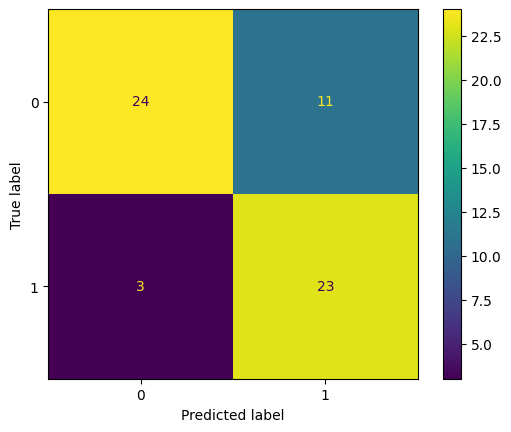

In [ ]:
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=modeloRL.classes_)
mostrarMatrix.plot()

In [ ]:
print(classification_report(y_test,y_prect))

              precision    recall  f1-score   support

           0       0.89      0.69      0.77        35
           1       0.68      0.88      0.77        26

    accuracy                           0.77        61
   macro avg       0.78      0.79      0.77        61
weighted avg       0.80      0.77      0.77        61



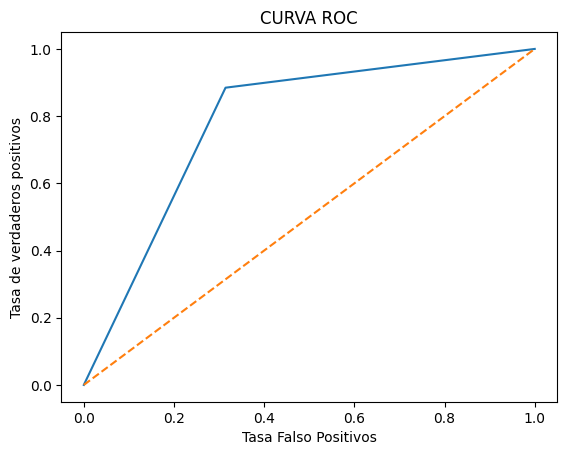

Area bajo la curva 0.7851648351648352


In [ ]:
# Curva de roc
fpr,tpr,umbral=roc_curve(y_test,y_prect) #falsos postivos - verdaderos positivos
#graficar la curva ROC
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"--") #escala y el (--) funciona para colocar la linea diagonal
plt.xlabel("Tasa Falso Positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("CURVA ROC")
plt.show()
#Area bajo la curva
print("Area bajo la curva",auc(fpr,tpr))

EL MARGEN DE ERROR MAXIMO QUE PODEMOS TENER ES DEL 10%

#Prueba del modelo Pasientes nuevos

In [ ]:
nuevo = [[55,280],[66,320],[48,220]] #3 nuevos pasientes
# se deben normaliazr
dato_transformado = escalador.fit_transform(nuevo)

In [ ]:
prediccion = modeloRL.predict(nuevo)
prediccion

array([1, 1, 1])

#class_weight - Optimizar el modelo



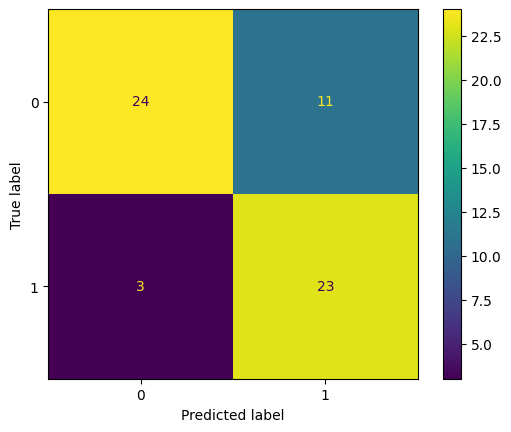

In [ ]:
#Por defecto
modeloRL = LogisticRegression(max_iter = 2000, verbose = 1, tol = 1e-6,class_weight="balanced")
#Entreno el modelo
modeloRL.fit(X_train, y_train)

#MAtriz de Confusión

matrix=confusion_matrix(y_test,y_prect)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=modeloRL.classes_)
mostrarMatrix.plot()

In [ ]:
#Se puede editar de distintas formas (Optimizar lo podemos encontrar en la pagina de su libreria)